#**Bài 6 của mô hình hóa toán học (Sử dụng tensor flow 1.9.0)**

In [ ]:
pip install tensorflow==1.9.0

     |████████████████████████████████| 51.1MB 87kB/s 
     |████████████████████████████████| 573kB 40.6MB/s 
     |████████████████████████████████| 3.3MB 39.3MB/s 
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: google-auth 1.17.2 has requirement setuptools>=40.3.0, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 51.1.1
    Uninstalling setuptools-51.1.1:
      Successfully uninstalled setuptools-51.1.1
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Step 0:
loss = [42.623085]
y0 = [0.4999999]
--------------------------------------------------
Step 50:
loss = [10.299842]
y0 = [2.2524116]
--------------------------------------------------
Step 100:
loss = [8.413577]
y0 = [1.9360638]
--------------------------------------------------
Step 150:
loss = [7.3424425]
y0 = [1.7042699]
--------------------------------------------------
Step 200:
loss = [6.3528037]
y0 = [1.4945216]
--------------------------------------------------
Step 250:
loss = [5.3379645]
y0 = [1.2965664]
--------------------------------------------------
Step 300:
loss = [4.339679]
y0 = [1.1128229]
--------------------------------------------------
Step 350:
loss = [3.4313807]
y0 = [0.9485504]
--------------------------------------------------
Step 400:
loss = [2.6663878]
y0 = [0.80776626]
--------------------------------------------------
Step 450:
loss = [2.062593]
y0 = [0.69173354]
--------------------------------------------------
Step 500:
loss = [1.6098515]
y0 = 

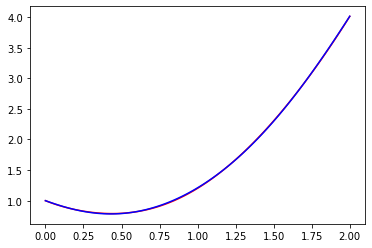

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


#-------------------- [KHOI TAO] -------------------------#
# Nhap so diem du lieu:
N = 100

#Nhap step muon train vao dayyyy:
trainStep = 10000

# Nhap so node cua hidden layer muon train:
n_node = 100

# Nhap pt y' - f(x,y)
def func(dy_dx, x, y):
  lq = (1+3*(x**2))/(1+x+x**3)
  return dy_dx + (x + lq)*y - x**3 - 2*x - lq*x*x

# Nhap dieu kien ban dau y(x_k) = y_k
k = 0
y_k = 1
#----------------------------------------------------------#

#Tao N diem trong doan [0,2] (Train data)
x_train = np.linspace(0,2,N,endpoint=True)    
# Copy x_train vao x_t de tinh toan
x_t      = np.zeros((len(x_train),1))
x_t[:,0] = x_train


#Nghiem chinh xac de so sanh: y = e^(-0.5.x^2)/(1 + x + x^3) + x^2
def func_y(x):
  return np.exp(-0.5*x**2)/(1+x+x**3)+x**2

# Target data
y_train = func_y(x_train)


#------------------------ [KHOI TAO NEURAL NETWORK] ----------------------#
# khoi tao Input [N,1]
x1 = tf.placeholder("float", [None,1 ]) 

# hidden layer: Sigmoid (n_node units)
W1 = tf.Variable(tf.zeros([1, n_node])) 
b1 = tf.Variable(tf.zeros([n_node]))
# Output cua hidden layer: y1 = sigmoid(x1.w + b) [N, n_node]
y1 = tf.nn.sigmoid(tf.matmul(x1, W1)+b1)

# Output layer: linear (y1.W1) (1 units)
W2 = tf.Variable(tf.zeros([n_node, 1]))

# Network output [N,1]
y = tf.matmul(y1, W2)

# Tinh dao ham dy/dx
dif = tf.matmul(tf.multiply(y1*(1-y1),W1),W2) 
#---------------------------------------------------------------------------#

t_loss = (func(dif, x1, y))**2


# Tinh loss function: (y' - f(x,y))^2 + (y(x0) - y0)^2
loss = tf.reduce_mean(t_loss) + (y[k] - y_k)**2

# Optimize
train_step = tf.train.AdamOptimizer(1e-2).minimize(loss)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

# Bat dau training  !!!
for i in range(trainStep):  
    sess.run(train_step,feed_dict={x1: x_t})
    if i%50 == 0:
        total_loss = sess.run(loss,feed_dict={x1: x_t})
        #In loss va in y0 de theo doi nha !!!
        print("Step {}:".format(i))
        print("loss = {}".format(total_loss))
        print("y0 = {}".format(sess.run(y[k], feed_dict={x1: x_t})))
        print("--------------------------------------------------")

# Luu model !!!
saver = tf.train.Saver(max_to_keep=1)
saver.save(sess,'Model cua Nhom/Phong.ckpt',global_step=trainStep)
saver = tf.train.Saver(max_to_keep=1)

# Lay model ra xai
model_file="Model cua Nhom/Phong.ckpt-" + str(trainStep)
saver.restore(sess, model_file)

#Day la output !!!
output = sess.run(y,feed_dict={x1:x_t})

# Khoi tao y_output co chieu bang x_train
y_output = x_train.copy()

for i in range(len(x_train)):
    y_output[i] = output[i]

# Ve bieu do:
plt.plot(x_train,y_train, 'r')
plt.plot(x_train,y_output, 'b')

plt.show()